# LOGISTIC REGRESSION TITANIC DATASET

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [4]:
%matplotlib inline

## import data

In [5]:
## passengeid
## survived  --> 0 not survived 1 surviced
## Pclass    --> passenger class(1, 2, 3)
## Name      --> name of passenger
## sex:      --> male and female
## Age:      --> Age of the passenger
## SibSp:    --> Number of Siblings
## Parch :   --> Number of parents/children
## Ticket:   --> Ticketnumber
## Fare:     --> Ticket price  
## Cabin     --> the cabin they were in
## Embarked  --> S(South Hamilton),Q(Queensland),C


In [79]:
train = pd.read_csv('titanic_train.csv')

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Create a heatmap to see the missing data

In [81]:
#Gives false if it is null false if it is not null
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


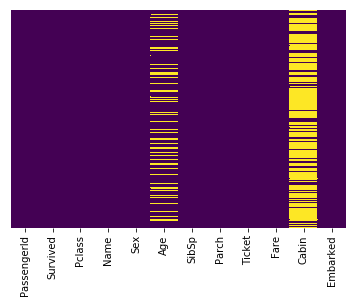

In [8]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [9]:
## We are missing some Age information and we are missing a lot of
## cabin information and one row of embarked. Rougly 20% of Age 
## information is missing. I can use the values of other clumns
## to fill it with reasonable values

##cabin to much information is missing, we are going to drop it 
##or change it

In [10]:
sns.set_style('whitegrid')

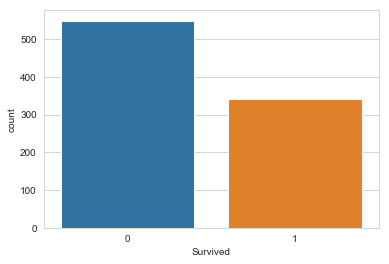

In [11]:
#who survived and who didn't survived
sns.countplot(x='Survived',data=train)

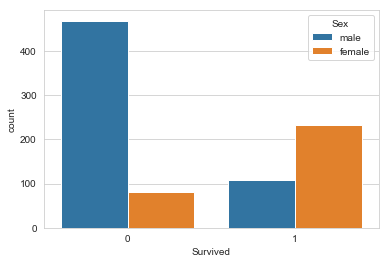

In [15]:
#survival with hue of sex
sns.countplot(x='Survived',data=train, hue='Sex')#,palette='RdBu_r')

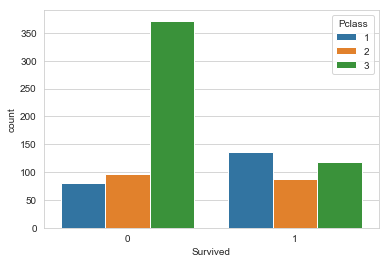

In [16]:
#it looks like that the people who are not survived are mosly 
# of the 3 class
sns.countplot(x='Survived',data=train,hue='Pclass')

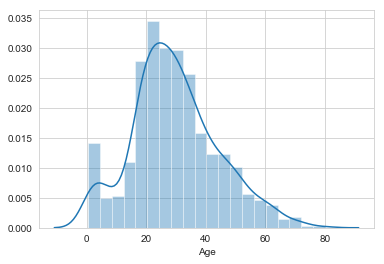

In [19]:
#remove nan values to make the distribution
sns.distplot(train['Age'].dropna())

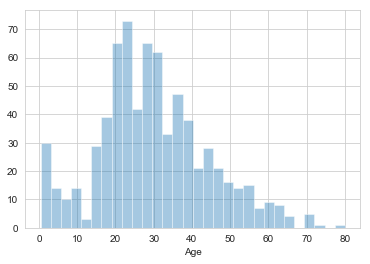

In [20]:
#there are quite few children, most passenger are between 20-40
# as older as less people are there 
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

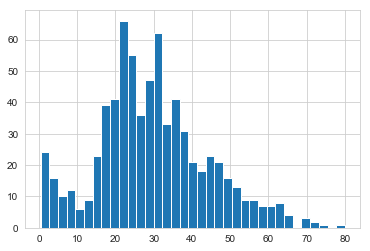

In [22]:
#pandas own plotting tools
train['Age'].hist(bins=35)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


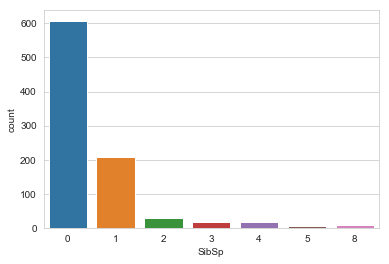

In [25]:
sns.countplot(x='SibSp',data=train)

In [26]:
# Most people did not have children on board, the second option single
#parent one children

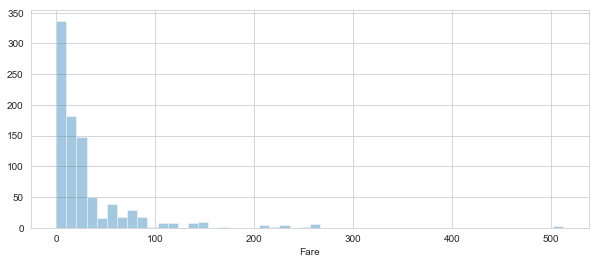

In [37]:
#How much people paid as distribution
plt.figure(figsize=(10,4))
sns.distplot(train['Fare'],kde=False)

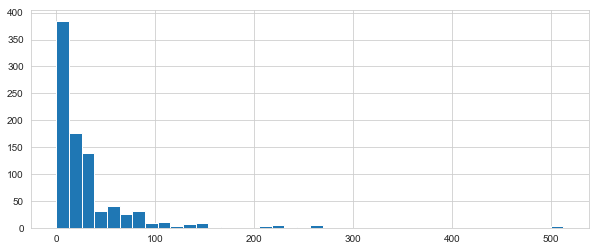

In [30]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [39]:
cf.go_offline()

In [42]:
train['Fare'].iplot(kind='hist',bins=40)

## Missing data

In [43]:
## We want to fill the missing data, for the Age column we can 
## fill in the missing data with the mean age values. This is 
# known as imputation

# We can make it a bit finer by checking the mean age by passenger 
# class

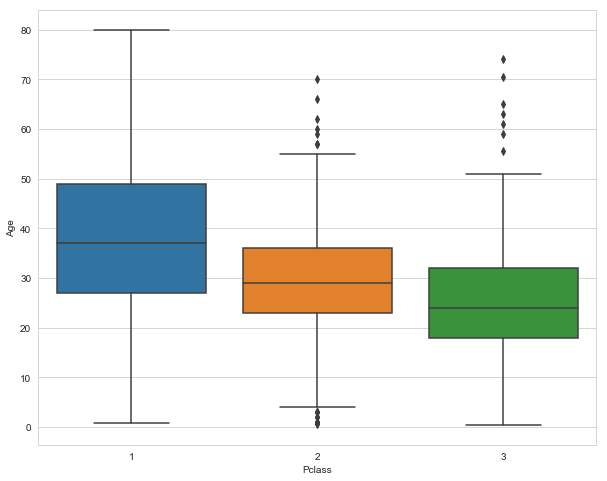

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Pclass',y='Age',data=train)

In [83]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [84]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

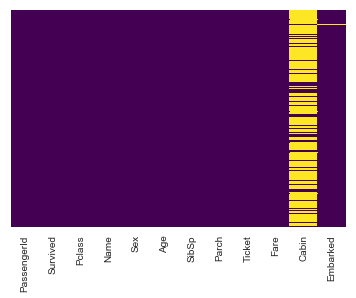

In [88]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [90]:
#in cabin column there is too much missing values, therefore we drop it
train.drop('Cabin',axis=1, inplace=True)

In [92]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


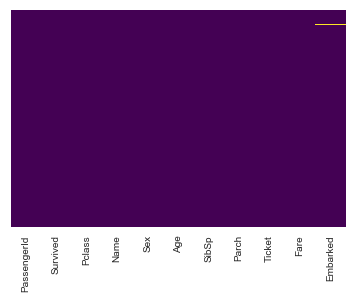

In [96]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
train.dropna(inplace=True)

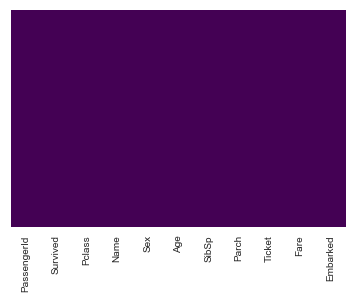

In [99]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Preparing the data so that the machine learning algorithm can work with: Creating a dummy variabe:

In [100]:
## For example if we look at Sex male or female the machine learning
## algorithm cannot work with this

# or embarked color which includes letter corresponding to a 
# city(S, C)

#Therefore we will introduce a new column with 0 or 1 value

In [101]:
#multi colinearity: if machine learning knows one color will 
#perfectly predict the other
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [102]:
pd.get_dummies(train['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [103]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [104]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [105]:
# This dataframe we can use for our machine learning algorithm
# We can do the same for the embarked column

In [106]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [107]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [108]:
# Use pd.concat to add these columns to our dataframe
train = pd.concat([train,sex,embark],axis=1)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [110]:
# Drop the columns that we are not going to use
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [111]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [112]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [113]:
train.drop('PassengerId',axis=1,inplace=True)

In [114]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Splitting the data into a training and test dataset to use for Logistic regression

In [115]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Create a model

In [118]:
from sklearn.linear_model import LogisticRegression

In [119]:
logmodel = LogisticRegression() 

## Training the model

In [120]:
logmodel.fit(X_train,y_train)

/home/faruk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
predictions = logmodel.predict(X_test)

## Error analysis

In [122]:
from sklearn.metrics import classification_report

In [123]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



## Confusion metric

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])

In [126]:
accuracy = (148 + 68)/(148+68+15+36)

In [127]:
accuracy

0.8089887640449438

In [128]:
error_rate = (15 + 36)/(148+68+15+36)

In [129]:
error_rate

0.19101123595505617